In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


antiguo_test = pd.read_csv("./frec_antiguo_test.csv")
nuevo_test = pd.read_csv("./frec_nuevo_test.csv")
coran = pd.read_csv("./frec_coran.csv")
tora = pd.read_csv("./frec_tora.csv")
upanishads = pd.read_csv("./frec_upanishads.csv")

Analisis de Textos Sagrados de las Religiones más profesadas en el mundo.

1. **Análisis de Frecuencias:**
   - Este enfoque nos permitirá identificar las palabras y términos más frecuentemente utilizados en cada texto. Al cuantificar la frecuencia de palabras, podemos obtener una visión general de los temas y conceptos predominantes en cada texto religioso.

2. **Correlación:**
   - Analizaremos la correlación entre los términos utilizados en los distintos textos. Esto nos ayudará a entender las similitudes y diferencias en el lenguaje y los temas entre las diversas escrituras, proporcionando una visión comparativa de su contenido.

3. **Análisis de Latent Dirichlet Allocation (LDA):**
   - LDA es una técnica de modelado de temas que nos permitirá descubrir temas subyacentes en los textos. Aplicando LDA, identificaremos los temas principales presentes en cada uno de los textos y analizaremos cómo se distribuyen estos temas a lo largo de los diferentes documentos.

La metodología empleada para este estudio incluye la preprocesamiento de los textos (limpieza, tokenización, y eliminación de palabras vacías), el cálculo de frecuencias de palabras, la evaluación de correlaciones y la aplicación del análisis LDA. Los resultados obtenidos proporcionarán una visión detallada y cuantitativa de la estructura y el contenido de estos textos religiosos, ofreciendo nuevas perspectivas sobre sus similitudes y diferencias.

Este análisis no solo contribuirá a la comprensión académica de estos textos sagrados, sino que también puede proporcionar herramientas útiles para estudios comparativos en campos como la teología, la lingüística y los estudios culturales.



CARGA DE ARCHIVOS ANTERIORMENTE PROCESADOS (TOKENIZACION) Y UNION EN UN DATAFRAME

In [3]:
antiguo_test.columns = ['Palabra', 'Antiguo_Test']
nuevo_test.columns = ['Palabra', 'Nuevo_Test']
coran.columns = ['Palabra', 'Coran']
tora.columns = ['Palabra', 'Tora']
upanishads.columns = ['Palabra', 'Upanishads']

df_merged = pd.merge(antiguo_test, nuevo_test, on='Palabra', how='outer')
df_merged = pd.merge(df_merged, coran, on='Palabra', how='outer')
df_merged = pd.merge(df_merged, tora, on='Palabra', how='outer')
df_merged = pd.merge(df_merged, upanishads, on='Palabra', how='outer')

df_merged.fillna(0, inplace=True)
df_merged.to_csv('frec_textos_sagrados.csv', index=False)
df_merged.head(10)

,Palabra,Antiguo_Test,Nuevo_Test,Coran,Tora,Upanishads
0,jehova,6926.0,0.0,0.0,0.0,0.0
1,dios,2876.0,1399.0,3065.0,62.0,119.0
2,hijos,2693.0,162.0,130.0,1827.0,5.0
3,tierra,2654.0,283.0,459.0,2031.0,62.0
4,israel,2560.0,73.0,43.0,40.0,0.0
5,rey,2423.0,92.0,13.0,7.0,30.0
6,hijo,1999.0,444.0,55.0,2108.0,25.0
7,dijo,1995.0,959.0,443.0,1872.0,69.0
8,mas,1809.0,717.0,413.0,1376.0,239.0
9,casa,1746.0,222.0,53.0,1353.0,4.0


LIMPIEZA DE PALABRAS

1-Primer filtrado Stopwords

2-Segundo filtrado palabras sin importancia para analisis

3-Union de los 2 para limpiar al maximo el dataframe

In [27]:
stopwords_esp = set(stopwords.words('spanish'))
eliminar = ["así", "si", "hacer", "cosas", "creo", "cómo", "solo", "aquí", "risas", "ser", "años", "gente",
            "vez", "historia", "ahora", "entonces", "bien", "puede", "pueden", "bueno", "aplauso",
            "aplausos", "ee", "uu", "datos", "personas", "hace", "hoy", "cada", "podemos", "ver", "dos",
            "luego", "hecho", "realmente", "tan", "decir", "saben", "ustedes", "dijo", "voy", "quiero",
            "bf", "dh", "número", "des", "gran", "día", "puedo", "mismo", "tres", "hombres", "mujeres",
            "hombre", "mujer", "hacia", "sólo", "manera", "tipo", "mejor", "tener", "alguien", "después",
            "gracias", "menos", "ejemplo", "parte", "respuesta", "forma", "todas", "muchas", "lugar",
            "poder", "incluso", "sino", "idea", "nunca", "dije", "momento", "siempre", "podría", "veces",
            "ahí", "sido", "allí", "dice", "va", "20and", "txt", "biblia", "4biblia", "documents",
            "20settings", "20electronicos", "11", "15", "03", "et", "pues", "12", "mas", "346", "administrador",
            "libros", "di", "coran", "41file", "4lfile", "06", "corán", "allá", "alla", "of", "delante", "tripe",
            "distintos", "remoto", "2011", "file", "libros_electronicos", "contectan", "reconocen", "disipado",
            "colocad", "penetrar", "20docu", "jarra", "girar", "1biblia", "1génesis","asi","habia","sera","tambien",
            "diciendo","aqui","dia","toda","hizo","despues","mano","alli","hablo"]
eliminar = set(eliminar) | stopwords_esp

df_merged = df_merged[~df_merged['Palabra'].isin(eliminar)]
df_merged = df_merged.sort_values(by='Antiguo_Test', ascending=False) # cambiar en By para revisar qeu texto sagrado verificar las palabras
df_merged.head(10)

,Palabra,Antiguo_Test,Nuevo_Test,Coran,Tora,Upanishads,Cluster,Sentimiento
0,jehova,6926.0,0.0,0.0,0.0,0.0,4,neutro
1,dios,2876.0,1399.0,3065.0,62.0,119.0,2,neutro
2,hijos,2693.0,162.0,130.0,1827.0,5.0,1,neutro
3,tierra,2654.0,283.0,459.0,2031.0,62.0,1,neutro
4,israel,2560.0,73.0,43.0,40.0,0.0,1,neutro
5,rey,2423.0,92.0,13.0,7.0,30.0,1,neutro
6,hijo,1999.0,444.0,55.0,2108.0,25.0,1,neutro
9,casa,1746.0,222.0,53.0,1353.0,4.0,1,neutro
10,pueblo,1650.0,162.0,244.0,1545.0,0.0,1,neutro
20,david,1092.0,59.0,16.0,0.0,0.0,1,neutro


PARA REALIZAR GRAFICOS

1-Cada texto de individualiza en relación a la frecuencia de sus palabras

2-Se Ordenan en nivel descendente.

3-Se crea una columan con la suma total de las frecuencias, despues se elimina del dataframe.

4-Se separan en porcentaje cada texto sagrado, para medir el top 20 de palabras y su proporción en los textos.

In [5]:
antiguo10 =df_merged[["Palabra", "Antiguo_Test"]]
antiguo10 = antiguo10.sort_values(by="Antiguo_Test", ascending=False)

nuevo10 =df_merged[["Palabra", "Nuevo_Test"]]
nuevo10 = nuevo10.sort_values(by="Nuevo_Test", ascending=False)

coran10 =df_merged[["Palabra", "Coran"]]
coran10 = coran10.sort_values(by="Coran", ascending=False)

tora10 =df_merged[["Palabra", "Tora"]]
tora10 = tora10.sort_values(by="Tora", ascending=False)

upanishads10 =df_merged[["Palabra", "Upanishads"]]
upanishads10 = upanishads10.sort_values(by="Upanishads", ascending=False)

df_merged ["Total"]= df_merged["Antiguo_Test"] + df_merged["Nuevo_Test"] + df_merged["Coran"] + df_merged["Tora"] + df_merged["Upanishads"]
total10 = df_merged[["Palabra", "Total"]]
total10 = total10.sort_values(by="Total", ascending=False)
df_merged = df_merged.drop(columns=["Total"])


In [6]:
df_total_porcenjates = pd.DataFrame(df_merged["Palabra"])
df_total_porcenjates["Antiguo_Test"] = df_merged["Antiguo_Test"]/len(df_merged["Antiguo_Test"])*100
df_total_porcenjates["Nuevo_Test"] = df_merged["Nuevo_Test"]/len(df_merged["Nuevo_Test"])*100
df_total_porcenjates["Coran"] = df_merged["Coran"]/len(df_merged["Coran"])*100
df_total_porcenjates["Tora"] = df_merged["Tora"]/len(df_merged["Tora"])*100
df_total_porcenjates["Upanishads"] = df_merged["Upanishads"]/len(df_merged["Upanishads"])*100
df_total_porcenjates ["Total"]= df_total_porcenjates["Antiguo_Test"] + df_total_porcenjates["Nuevo_Test"] + df_total_porcenjates["Coran"] + df_total_porcenjates["Tora"] + df_total_porcenjates["Upanishads"]
df_total_porcenjates = df_total_porcenjates.sort_values(by="Total", ascending=False)
df_total_porcenjates

,Palabra,Antiguo_Test,Nuevo_Test,Coran,Tora,Upanishads,Total
29836,יהוה,0.000000,0.000000,0.000000,10.648320,0.000000,10.648320
1,dios,3.555621,1.729595,3.789284,0.076651,0.147121,9.298272
0,jehova,8.562668,0.000000,0.000000,0.000000,0.000000,8.562668
3,tierra,3.281161,0.349875,0.567465,2.510941,0.076651,6.786094
29837,yahweh,0.000000,0.000000,0.000000,6.081399,0.000000,6.081399
...,...,...,...,...,...,...,...
76566,yirah,0.000000,0.000000,0.000000,0.001236,0.000000,0.001236
76567,hanachri,0.000000,0.000000,0.000000,0.001236,0.000000,0.001236
76568,keamcha,0.000000,0.000000,0.000000,0.001236,0.000000,0.001236
76569,veladaat,0.000000,0.000000,0.000000,0.001236,0.000000,0.001236


In [7]:
top20 = df_total_porcenjates.head(20)
df_plot = top20.set_index('Palabra')[["Antiguo_Test", "Nuevo_Test", "Coran", "Tora", "Upanishads"]]

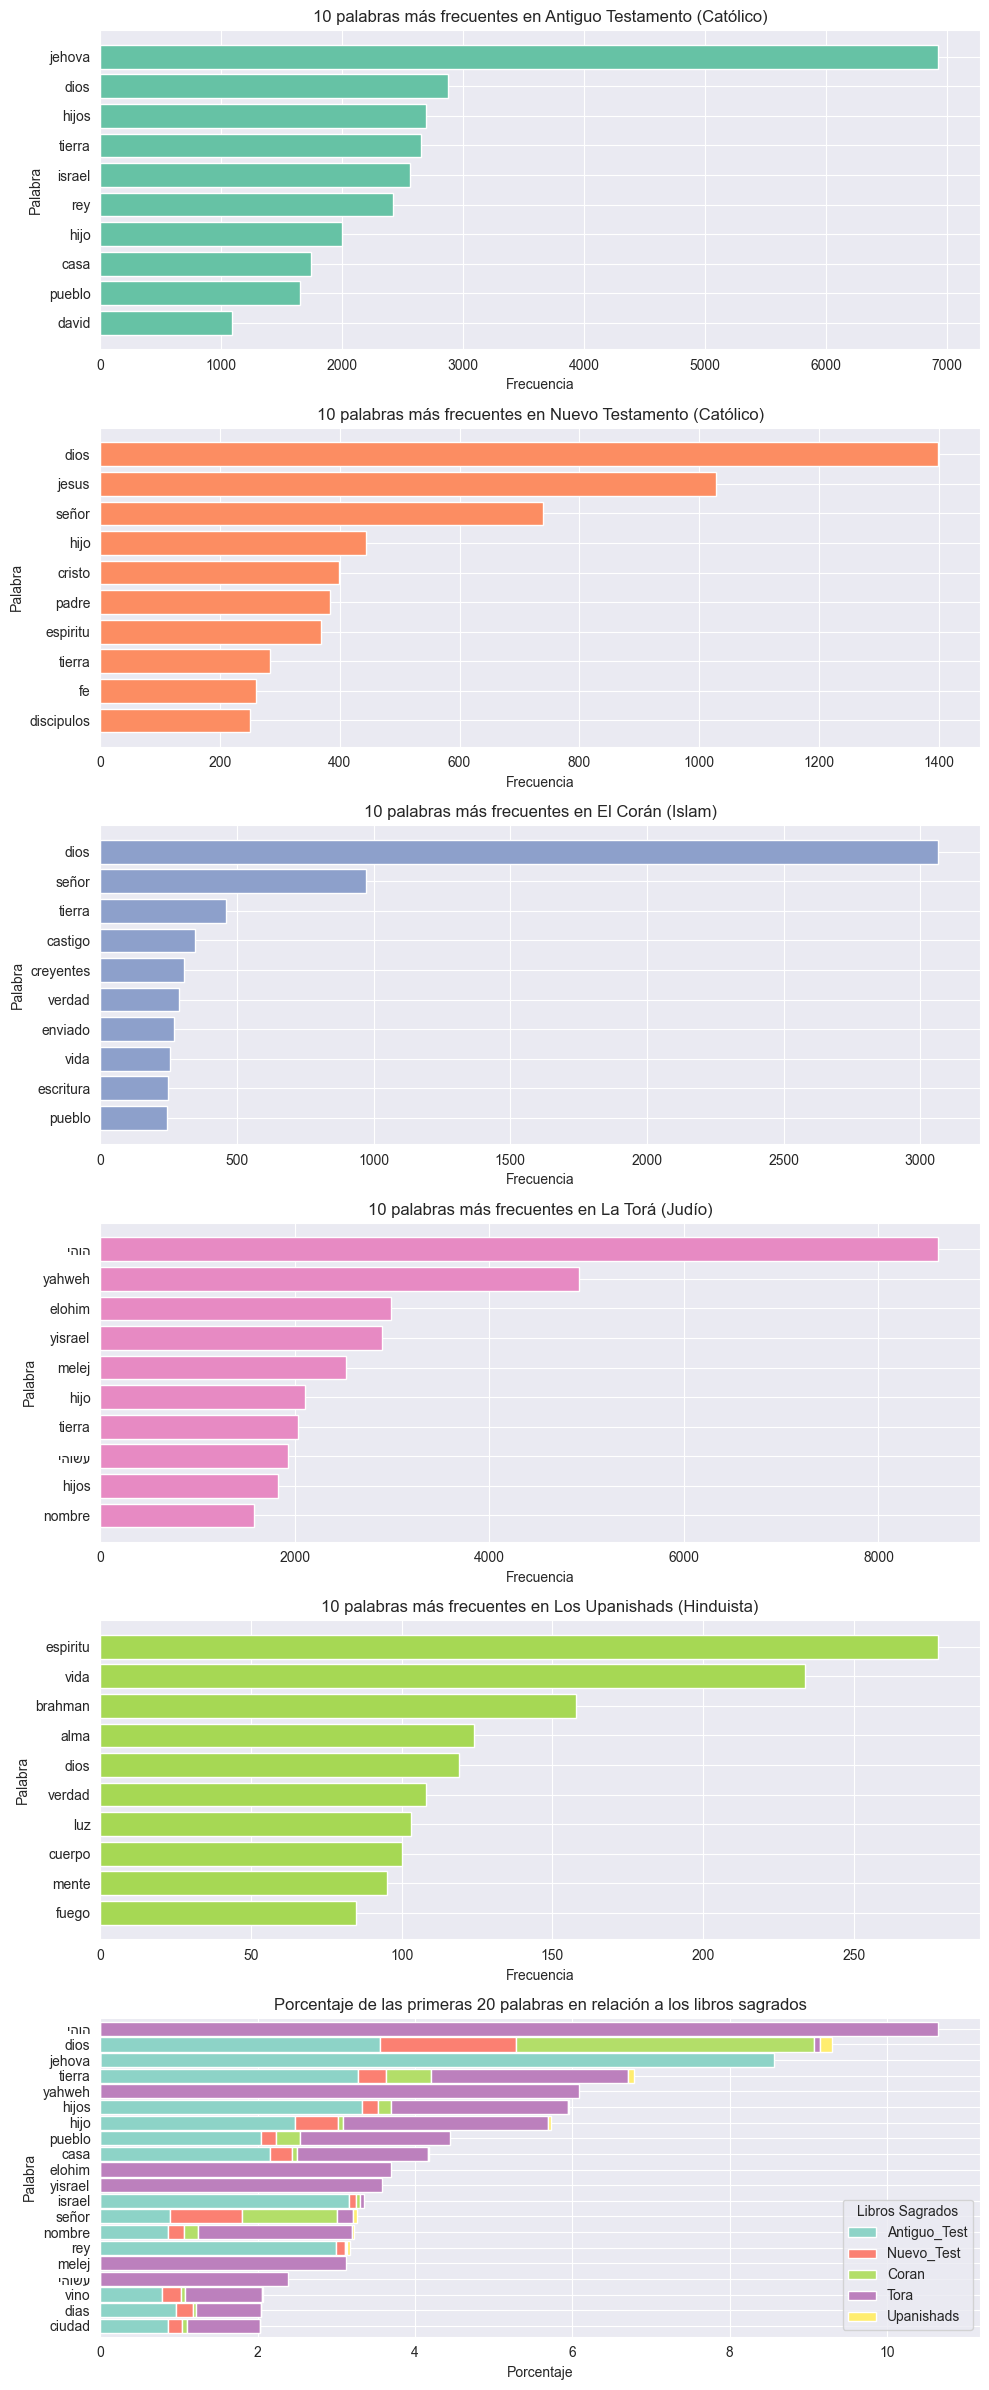

In [8]:
# Suponiendo que ya tienes los datos cargados en 'antiguo10', 'nuevo10', 'coran10', 'tora10', 'upanishads10', 'total10'

# Configuración de estilo
sns.set_style("darkgrid")  # Establecer estilo Seaborn

# Crear figura y ejes
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, figsize=(10, 24))

# Obtener una nueva paleta de colores
colores_nueva_paleta = sns.color_palette("Set2", n_colors=6)

# Gráfico 1: Antiguo Testamento
ax1.barh(antiguo10["Palabra"].head(10), antiguo10["Antiguo_Test"].head(10), color=colores_nueva_paleta[0])
ax1.set_title('10 palabras más frecuentes en Antiguo Testamento (Católico)')
ax1.set_xlabel('Frecuencia')
ax1.set_ylabel('Palabra')
ax1.invert_yaxis()

# Gráfico 2: Nuevo Testamento
ax2.barh(nuevo10["Palabra"].head(10), nuevo10["Nuevo_Test"].head(10), color=colores_nueva_paleta[1])
ax2.set_title('10 palabras más frecuentes en Nuevo Testamento (Católico)')
ax2.set_xlabel('Frecuencia')
ax2.set_ylabel('Palabra')
ax2.invert_yaxis()

# Gráfico 3: Corán
ax3.barh(coran10["Palabra"].head(10), coran10["Coran"].head(10), color=colores_nueva_paleta[2])
ax3.set_title('10 palabras más frecuentes en El Corán (Islam)')
ax3.set_xlabel('Frecuencia')
ax3.set_ylabel('Palabra')
ax3.invert_yaxis()

# Gráfico 4: Tora
ax4.barh(tora10["Palabra"].head(10), tora10["Tora"].head(10), color=colores_nueva_paleta[3])
ax4.set_title('10 palabras más frecuentes en La Torá (Judío)')
ax4.set_xlabel('Frecuencia')
ax4.set_ylabel('Palabra')
ax4.invert_yaxis()

# Gráfico 5: Upanishads
ax5.barh(upanishads10["Palabra"].head(10), upanishads10["Upanishads"].head(10), color=colores_nueva_paleta[4])
ax5.set_title('10 palabras más frecuentes en Los Upanishads (Hinduista)')
ax5.set_xlabel('Frecuencia')
ax5.set_ylabel('Palabra')
ax5.invert_yaxis()

# Gráfico 6: Total en porcentaje
df_plot.plot(kind='barh', stacked=True, ax=ax6, colormap='Set3', width=0.9)
ax6.set_title('Porcentaje de las primeras 20 palabras en relación a los libros sagrados')
ax6.set_xlabel('Porcentaje')
ax6.set_ylabel('Palabra')
ax6.legend(title='Libros Sagrados')
ax6.invert_yaxis()  # Invertir el eje y para que la palabra con el porcentaje más alto esté en la parte superior

plt.tight_layout()
plt.show()

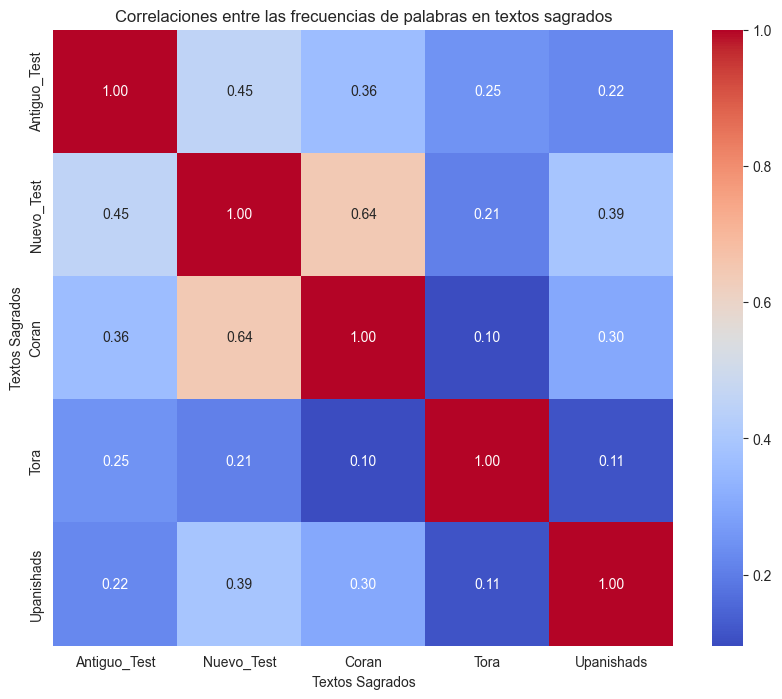

In [9]:
correlaciones = df_merged.iloc[:, 1:].corr()
# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Crear el mapa de calor de las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre las frecuencias de palabras en textos sagrados")
plt.xlabel("Textos Sagrados")
plt.ylabel("Textos Sagrados")
plt.show()

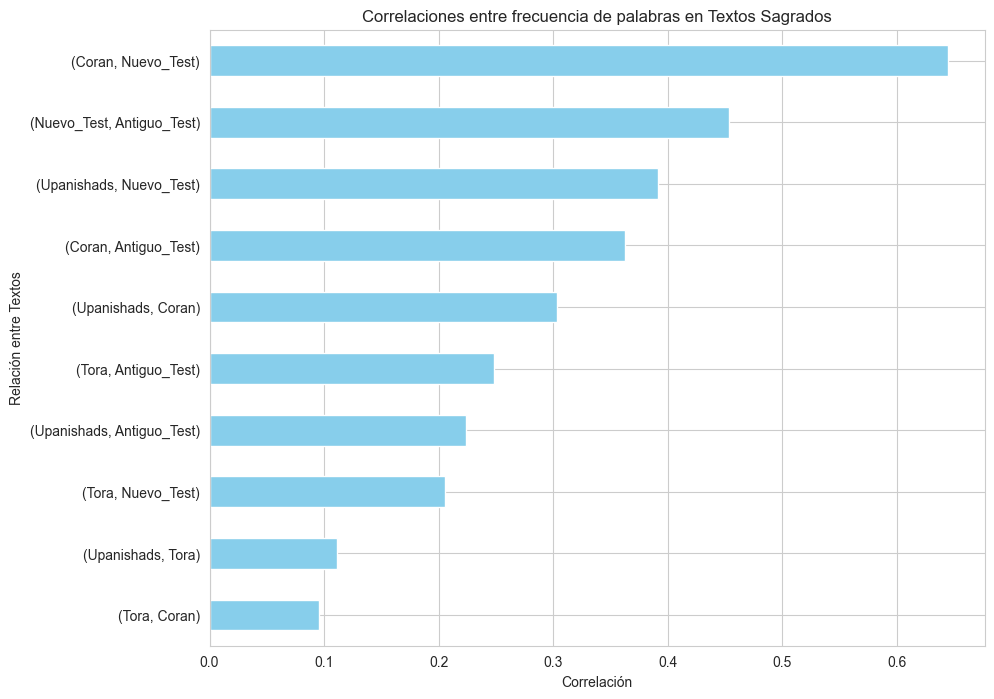

In [10]:
# Calcular las correlaciones entre las palabras
correlaciones = df_merged.iloc[:, 1:].corr()

# Obtener las correlaciones de todas las palabras consigo mismas (diagonales)
correlaciones = correlaciones.mask(np.triu(np.ones(correlaciones.shape)).astype(bool))

# Apilar las correlaciones en una sola columna y ordenar de mayor a menor
correlaciones_stacked = correlaciones.stack().sort_values(ascending=False)

# Graficar todas las correlaciones
plt.figure(figsize=(10, 8))
correlaciones_stacked.plot(kind='barh', color='skyblue')
plt.xlabel('Correlación')
plt.ylabel('Relación entre Textos')
plt.title('Correlaciones entre frecuencia de palabras en Textos Sagrados')
plt.gca().invert_yaxis()  # Invertir el eje y para que la palabra con la correlación más alta esté en la parte superior
plt.show()

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Eliminamos la columna 'Palabra' ya que no la necesitamos para el clustering
X = df_merged.drop('Palabra', axis=1)

# Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creamos el modelo de K-means
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustamos el modelo a los datos
kmeans.fit(X_scaled)

# Obtenemos las etiquetas de los clústeres para cada palabra
cluster_labels = kmeans.labels_

# Agregamos las etiquetas de los clústeres al DataFrame original
df_merged['Cluster'] = cluster_labels

# Visualizamos los clústeres y sus características
cluster_means = df_merged.groupby('Cluster').mean()

print(cluster_means)

         Antiguo_Test   Nuevo_Test        Coran         Tora  Upanishads
Cluster                                                                 
0            2.220084     0.651650     0.565080     4.759013    0.104157
1          498.782051   152.538462    77.782051   373.692308   38.794872
2         2876.000000  1399.000000  3065.000000    62.000000  119.000000
3            0.000000     0.000000     0.000000  4388.200000    0.000000
4         6926.000000     0.000000     0.000000     0.000000    0.000000


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22500\496812180.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df_merged.groupby('Cluster').mean()


<Figure size 1000x600 with 0 Axes>

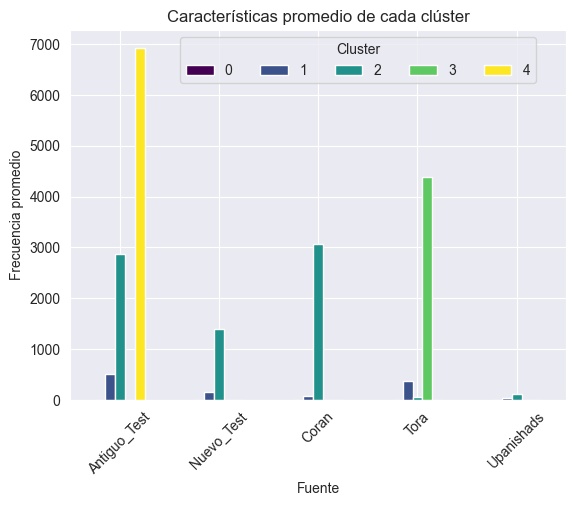

In [26]:
plt.figure(figsize=(10, 6))
cluster_means.T.plot(kind='bar', cmap='viridis')
plt.title('Características promedio de cada clúster')
plt.xlabel('Fuente')
plt.ylabel('Frecuencia promedio')
plt.xticks(rotation=45)
plt.legend(title='Cluster', loc='upper center', bbox_to_anchor=(0.58, 1.00), ncol=5)  # Ajusta 'bbox_to_anchor' según sea necesario
plt.show() 

Analisis de Sentimiento

Utilizando la libreria Textblob que tiene Lexicones en español para el analisis de opinion o sentimientos.

Es dificil asegurar la polaridad de las palabras , especialmente en textos de caracter sagrado para conjuntos de humanos que desde una perspectiva epistemologica aseguran como real, sagrado y la verdad el contenido de estos textos. 
Aun así, los resultados son interesantes ya que el modelo logra identificar como neutral la gran mayoria de las palabras alojadas en estos textos, lo que apriori  se podria entender como un modelo sin una tendencia o juicio en su configuracion.

In [1]:
from textblob import TextBlob

# Definir una función para asignar polaridades a las palabras
def asignar_polaridad(palabra):
    try:
        blob = TextBlob(str(palabra))
        polaridad = blob.sentiment.polarity
        if polaridad > 0:
            return 'positivo'
        elif polaridad < 0:
            return 'negativo'
        else:
            return 'neutro'
    except:
        return 'desconocido'


# Aplicar la función a cada palabra en la columna 'Palabra' y crear la nueva columna 'Sentimiento'
df_merged['Sentimiento'] = df_merged['Palabra'].astype(str).apply(asignar_polaridad)

# Imprimir las primeras filas del DataFrame resultante
df_merged.head

NameError: name 'df_merged' is not defined

In [14]:
antiguo10 = df_merged[["Sentimiento", "Antiguo_Test"]]
antiguo10 = antiguo10.sort_values(by="Antiguo_Test", ascending=False)

nuevo10 = df_merged[["Sentimiento", "Nuevo_Test"]]
nuevo10 = nuevo10.sort_values(by="Nuevo_Test", ascending=False)

coran10 = df_merged[["Sentimiento", "Coran"]]
coran10 = coran10.sort_values(by="Coran", ascending=False)

tora10 = df_merged[["Sentimiento", "Tora"]]
tora10 = tora10.sort_values(by="Tora", ascending=False)

upanishads10 = df_merged[["Sentimiento", "Upanishads"]]
upanishads10 = upanishads10.sort_values(by="Upanishads", ascending=False)

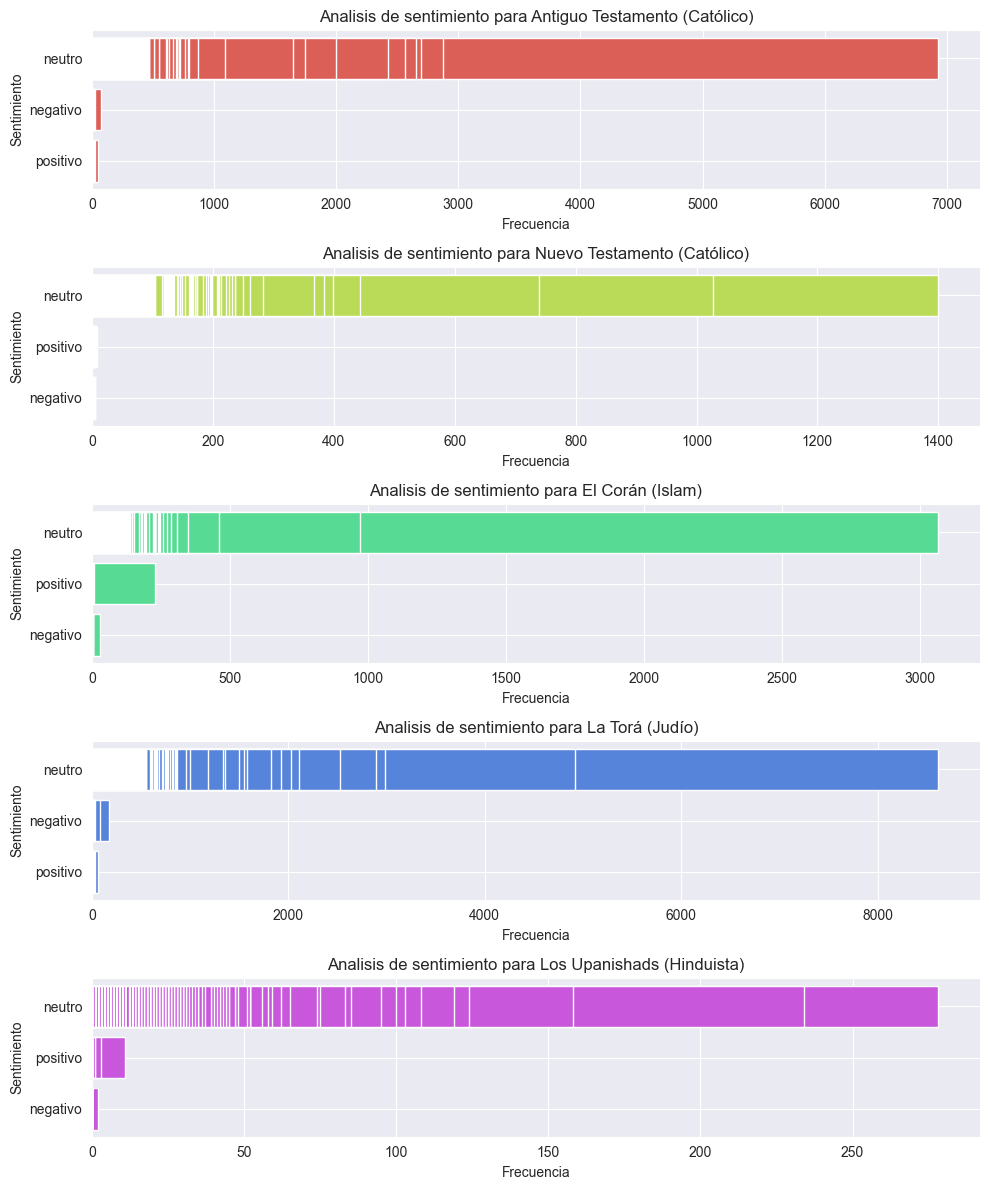

In [15]:
sns.set_style("darkgrid")  # Establecer estilo Seaborn

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, figsize=(10, 12))

colores_seaborn = sns.color_palette("hls", n_colors=5)

# Gráfico 1: Antiguo Testamento
ax1.barh(antiguo10["Sentimiento"], antiguo10["Antiguo_Test"], color=colores_seaborn[0])
ax1.set_title('Analisis de sentimiento para Antiguo Testamento (Católico)')
ax1.set_xlabel('Frecuencia')
ax1.set_ylabel('Sentimiento')
ax1.invert_yaxis()

# Gráfico 2: Nuevo Testamento
ax2.barh(nuevo10["Sentimiento"], nuevo10["Nuevo_Test"], color=colores_seaborn[1])
ax2.set_title('Analisis de sentimiento para Nuevo Testamento (Católico)')
ax2.set_xlabel('Frecuencia')
ax2.set_ylabel('Sentimiento')
ax2.invert_yaxis()

# Gráfico 3: Corán
ax3.barh(coran10["Sentimiento"], coran10["Coran"], color=colores_seaborn[2])
ax3.set_title('Analisis de sentimiento para El Corán (Islam)')
ax3.set_xlabel('Frecuencia')
ax3.set_ylabel('Sentimiento')
ax3.invert_yaxis()

# Gráfico 4: Tora
ax4.barh(tora10["Sentimiento"], tora10["Tora"], color=colores_seaborn[3])
ax4.set_title('Analisis de sentimiento para La Torá (Judío)')
ax4.set_xlabel('Frecuencia')
ax4.set_ylabel('Sentimiento')
ax4.invert_yaxis()

# Gráfico 5: Upanishads
ax5.barh(upanishads10["Sentimiento"], upanishads10["Upanishads"], color=colores_seaborn[4])
ax5.set_title('Analisis de sentimiento para Los Upanishads (Hinduista)')
ax5.set_xlabel('Frecuencia')
ax5.set_ylabel('Sentimiento')
ax5.invert_yaxis()

plt.tight_layout()
plt.show()
#se demora como 14 min, ver otros metodos de graficar !!

Asignación de Dirichlet Latente (LDA)
Latent Dirichlet Allocation

también conocido como Asignación de Dirichlet Latente, es un modelo estadístico probabilístico que se utiliza para identificar temas subyacentes en un conjunto de documentos. Es una técnica de aprendizaje automático popular en el campo del procesamiento del lenguaje natural (PLN) y se ha aplicado a una amplia gama de tareas

In [16]:
antiguo = pd.read_csv("./Catolico/La biblia antiguo-1-1174.csv")
nuevo = pd.read_csv(".\Catolico\La biblia nuevo-1175-1520.csv")
coran = pd.read_csv("./Islam/Coran.csv")
upanishads = pd.read_csv("./Hinduismo/Upanishads.csv")
tora = pd.read_csv("./Judaismo/Torah.csv")

data = [
    {"Texto Sagrado": "Antiguo Testamento", "Contenido": antiguo.iloc[:, 0].values[0]},
    {"Texto Sagrado": "Nuevo Testamento", "Contenido": nuevo.iloc[:, 0].values[0]},
    {"Texto Sagrado": "Corán", "Contenido": coran.iloc[:, 0].values[0]},
    {"Texto Sagrado": "Upanishads", "Contenido": upanishads.iloc[:, 0].values[0]},
    {"Texto Sagrado": "Torá", "Contenido": tora.iloc[:, 0].values[0]}
]
df = pd.DataFrame(data)

In [17]:
stopwords_esp = set(stopwords.words('spanish'))
stopwords_esp = stopwords_esp.union({"así", "si", "hacer", "cosas","creo", "cómo", "solo", "aquí", "risas","ser", "años", "gente","vez", "historia", "ahora", "entonces", "bien", "puede", "pueden", "bueno", "aplauso", "aplausos","ee","uu", "datos", "personas", "hace", "hoy", "cada", "podemos", "ver", "dos", "luego", "hecho", "realmente","tan","decir", "saben", "ustedes","dijo", "voy", "quiero", "bf", "dh", "número","des", "gran", "día", "puedo", "mismo", "tres", "hombres", "mujeres", "hombre", "mujer","hacia", "sólo", "manera", "tipo", "mejor", "tener", "alguien", "después","gracias","menos", "ejemplo", "parte", "respuesta", "forma", "todas", "muchas", "lugar", "poder","incluso", "sino", "idea", "nunca", "dije", "momento", "siempre", "podría", "veces", "ahí","sido", "allí", "dice", "va",
                                    "20and","txt","biblia","4biblia","documents",
                                    "20settings","20electronicos","11","15","03",
                                    "et","pues","12","mas","346","administrador",
                                    "libros","di","coran","41file","4lfile","06",
                                    "corán","allá","alla","of","delante","tripe",
                                    "distintos","remoto","2011","file","libros_electronicos",
                                    "contectan","reconocen","disipado","colocad",
                                    "penetrar","20docu","jarra","girar","1biblia","1génesis"})

stopwords_esp = list(stopwords_esp)

In [18]:
vectorizer = CountVectorizer(stop_words=stopwords_esp)
X= vectorizer.fit_transform(df["Contenido"])
X

<5x77619 sparse matrix of type '<class 'numpy.int64'>'
	with 108303 stored elements in Compressed Sparse Row format>

In [19]:
lda = LatentDirichletAllocation(
    n_components=4, random_state=12345
)

In [20]:
lda.fit(X)

LatentDirichletAllocation(n_components=4, random_state=12345)

In [21]:
def graficar_palabras_top (model, feature_names, n_top_words=10):   
    fig, axes = plt.subplots(1, 4, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]   
        
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Tema {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle('Asignación de Dirichlet Latente (LDA) para Textos Sagrados', fontsize=40)   
    
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [22]:
palabras = vectorizer.get_feature_names_out()

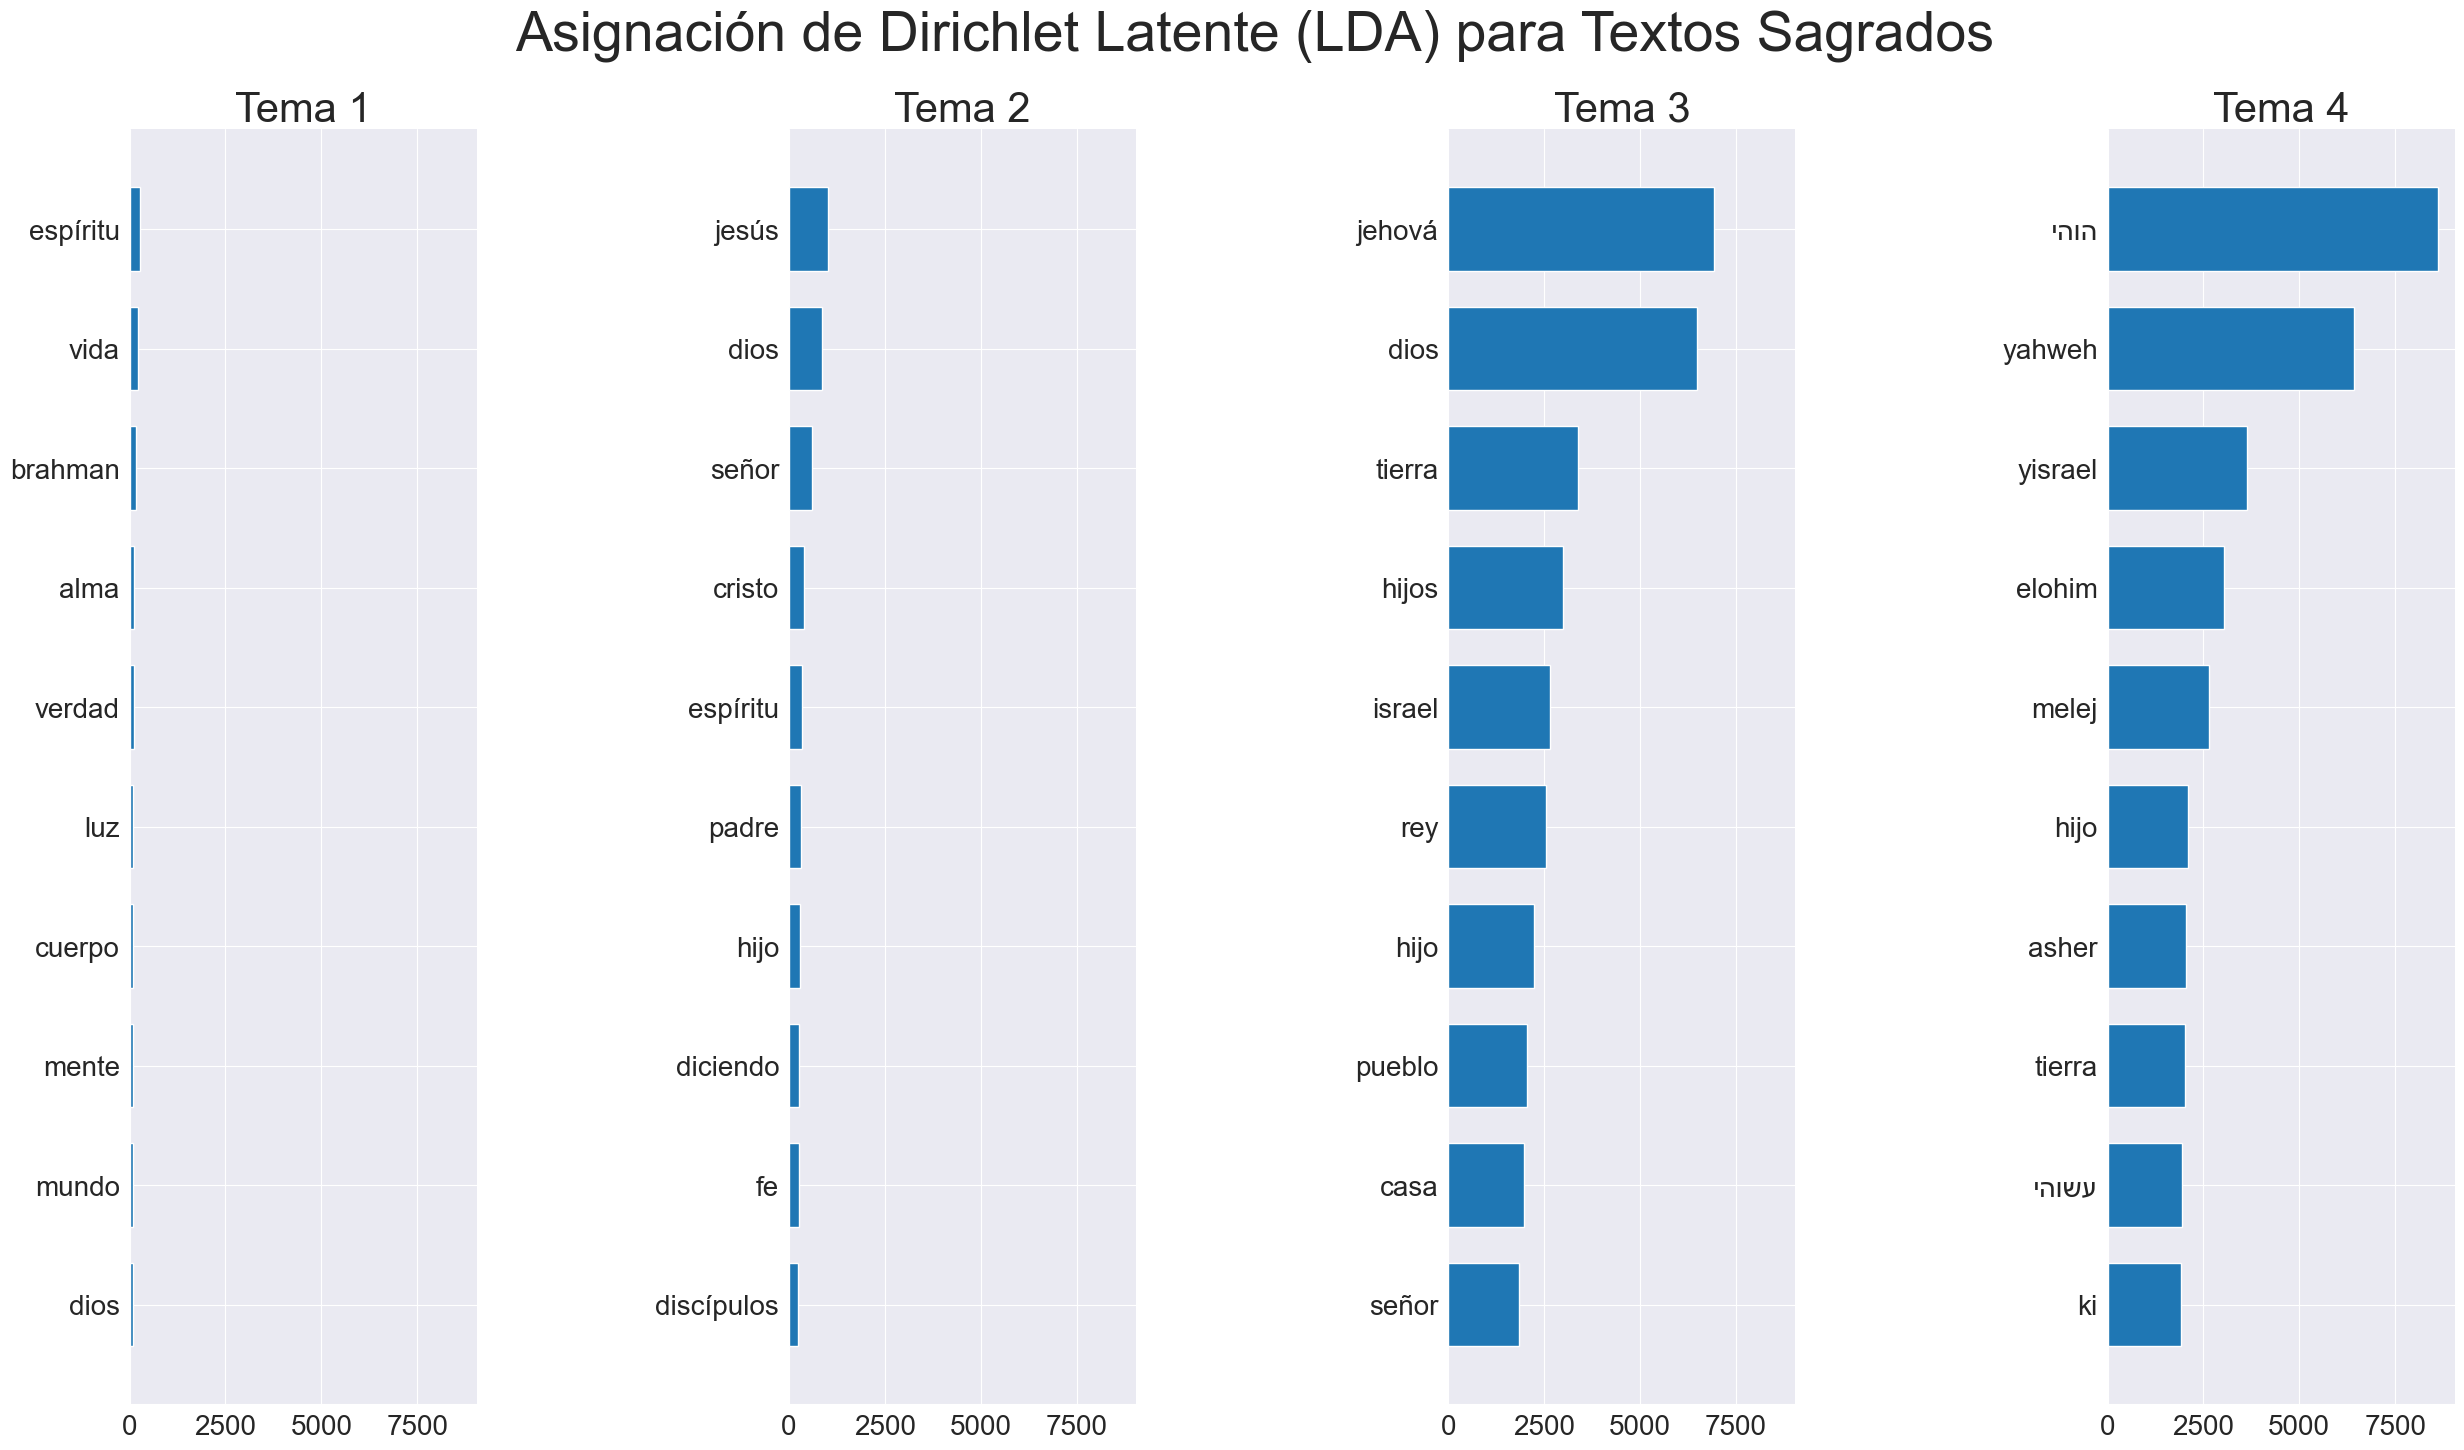

In [23]:
graficar_palabras_top(lda, palabras)